In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
%cd /content/drive/MyDrive/Assignment-1/

/content/drive/MyDrive/Assignment-1


In [33]:
# task 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Reading CSV
data = pd.read_csv("WHR-2024-5CS037.csv")

In [35]:
# Display the first 10 rows
print("First 10 rows of the dataset:")
print(data.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [36]:
# task 2: Dataset Overview
# Identify the number of rows and columns in the dataset
print("\nNumber of rows and columns in the dataset:")
print(data.shape)


Number of rows and columns in the dataset:
(143, 9)


In [37]:
# List all the columns and their data types
print("\nColumns and their data types:")
print(data.dtypes)


Columns and their data types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [38]:
# task 3: Basic Statistics
# Calculate the mean, median, and standard deviation for the "Score" column
print("\nBasic Statistics for 'score' column:")
print(f"Mean: {data['score'].mean()}")
print(f"Median: {data['score'].median()}")
print(f"Standard Deviation: {data['score'].std()}")


Basic Statistics for 'score' column:
Mean: 5.52758041958042
Median: 5.785
Standard Deviation: 1.1707165099442995


In [39]:
# Identify the country with the highest and lowest happiness scores
max_score_country = data.loc[data['score'].idxmax(), 'Country name']
min_score_country = data.loc[data['score'].idxmin(), 'Country name']
print(f"\nCountry with the highest score: {max_score_country}")
print(f"Country with the lowest score: {min_score_country}")


Country with the highest score: Finland
Country with the lowest score: Afghanistan


In [40]:
# task 4: Missing Values
# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [41]:

# task 5: Filtering and Sorting
# Filter the dataset for scores greater than 7.5
filtered_data = data[data['score'] > 7.5]
print("\nCountries with a score greater than 7.5:")
print(filtered_data)




Countries with a score greater than 7.5:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


In [42]:
# Sort the filtered dataset by GDP per Capita in descending order and display the top 10 rows

sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 countries sorted by GDP per Capita (descending):")
print(sorted_data.head(10))


Top 10 countries sorted by GDP per Capita (descending):
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [43]:
# task 6: Adding New Columns
# Create a new column 'Happiness Category'
def categorize_happiness(score):
    if score < 4:
        return "Low"
    elif 4 <= score <= 6:
        return "Medium"
    else:
        return "High"

data['Happiness Category'] = data['score'].apply(categorize_happiness)
print("\nDataset with 'Happiness Category' column added:")
print(data.head())


Dataset with 'Happiness Category' column added:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3                    0.724                         0.838       0.221   
4                    0.740                         0.641       0.153   

   Perceptions of corruption  Dystopia + residual Happiness Category  
0                      0.546                2.082               High  
1        

<ipython-input-44-9198d3675bce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')


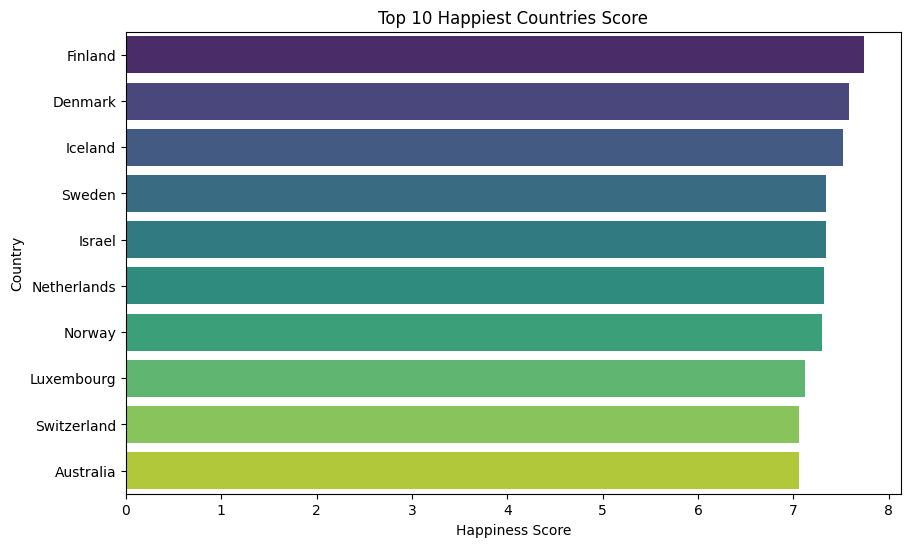

In [44]:
# task 7: Data Visualizations
# 1. Bar Plot: Top 10 happiest countries
top_10_happiest = data.nlargest(10, 'score')
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='viridis')
plt.title('Top 10 Happiest Countries Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

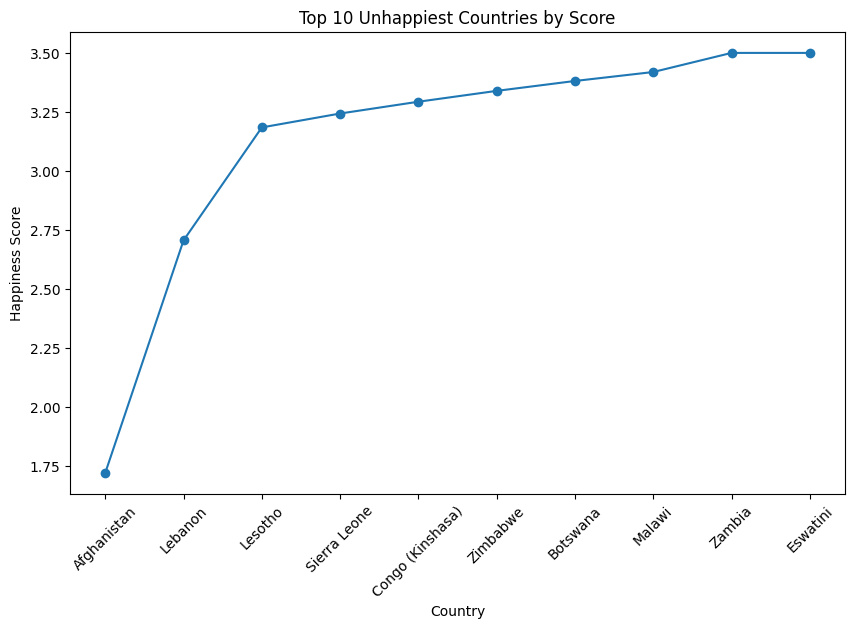

In [45]:
# 2. Line Plot: Top 10 unhappiest countries
top_10_unhappiest = data.nsmallest(10, 'score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)
plt.show()

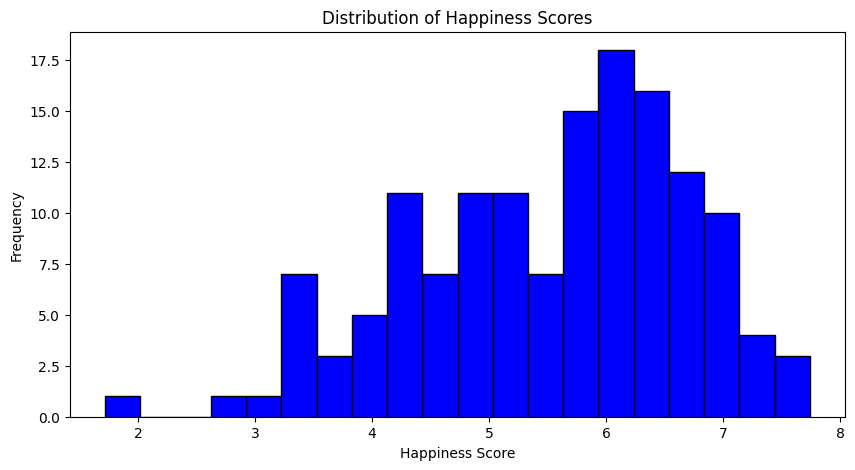

In [74]:
# 3. Histogram for the "Score" column

plt.figure(figsize=(10, 5))
plt.hist(data['score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

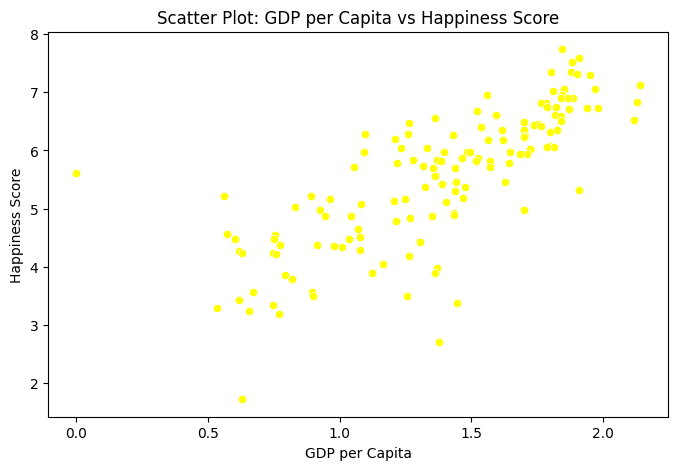

In [75]:
# 4. Scatter Plot: GDP per Capita vs Score

plt.figure(figsize=(8, 5))
sns.scatterplot(x='Log GDP per capita', y='score', data=data, color='yellow')
plt.title('Scatter Plot: GDP per Capita vs Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# **SOLUTION 2**

In [48]:
#1. Define the countries in South Asia with a list for example:
#south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [49]:
# Step 1: Filter the dataset for South Asian countries
south_asia_data = data[data['Country name'].isin(south_asian_countries)]


In [50]:
# Save the filtered South Asian dataset for future use
south_asia_data.to_csv('SouthAsia_Happiness.csv', index=False)
print("Filtered South Asian dataset saved as 'SouthAsia_Happiness.csv'")

Filtered South Asian dataset saved as 'SouthAsia_Happiness.csv'


In [51]:
south_asia_data = south_asia_data.copy()

# Create the Composite Score column
south_asia_data['Composite Score'] = (
    0.40 * south_asia_data['Log GDP per capita'] +
    0.30 * south_asia_data['Social support'] +
    0.30 * south_asia_data['Healthy life expectancy']
)


<ipython-input-79-e38aa1ccec6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')


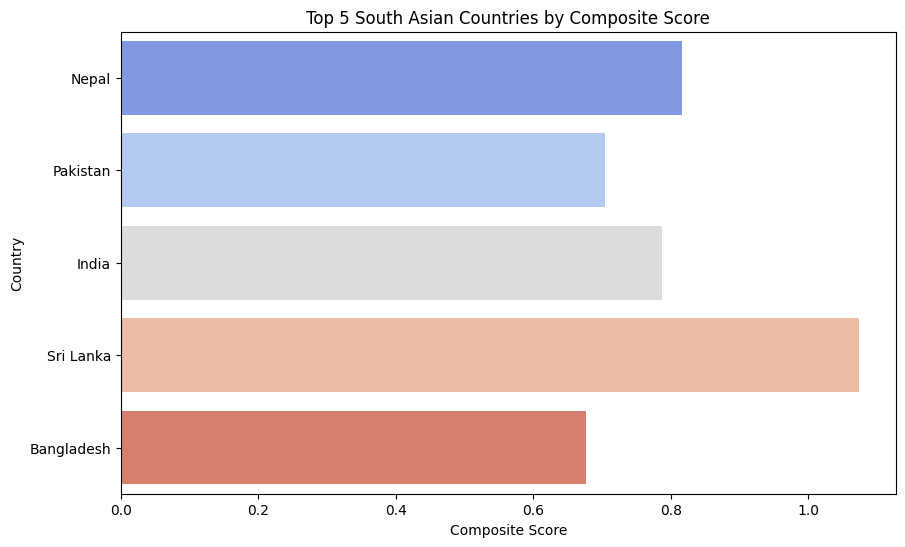

In [79]:
top_5_composite = south_asia_data.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=top_5_composite, palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()

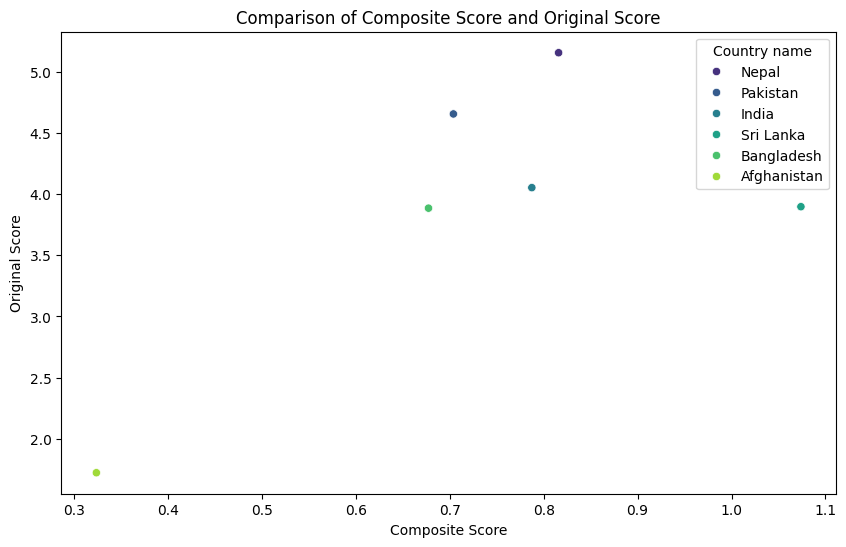

In [53]:
# 4. Compare Composite Score rankings with the original Score

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Composite Score', y='score', data=south_asia_data, hue='Country name', palette='viridis')
plt.title('Comparison of Composite Score and Original Score')
plt.xlabel('Composite Score')
plt.ylabel('Original Score')
plt.show()

In [54]:
# Task 3: Outlier Detection
# 1. Identify outliers based on Score and GDP per Capita using the 1.5x IQR rule
def detect_outliers(column):
    Q1 = south_asia_data[column].quantile(0.25)
    Q3 = south_asia_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return south_asia_data[(south_asia_data[column] < lower_bound) | (south_asia_data[column] > upper_bound)]

outliers_score = detect_outliers('score')
outliers_gdp = detect_outliers('Log GDP per capita')


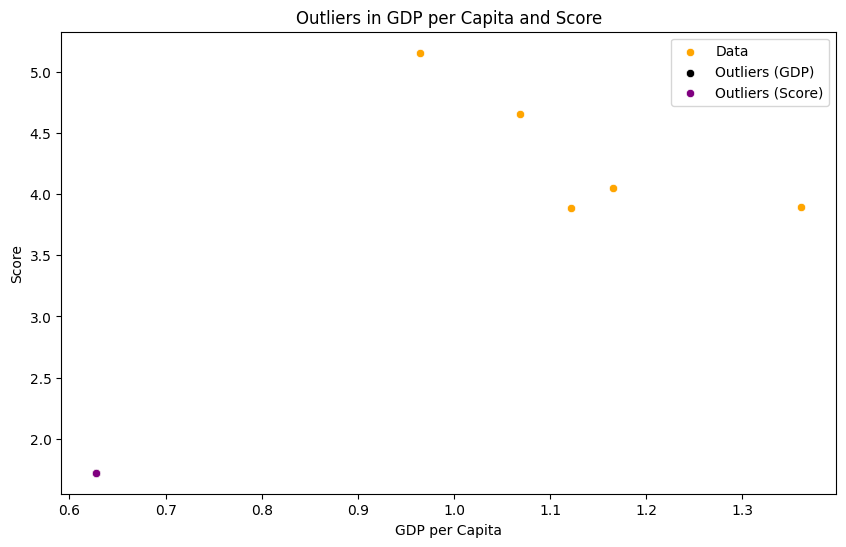

In [80]:
# 2. Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='orange', label='Data')
sns.scatterplot(x=outliers_gdp['Log GDP per capita'], y=outliers_gdp['score'], color='black', label='Outliers (GDP)')
sns.scatterplot(x=outliers_score['Log GDP per capita'], y=outliers_score['score'], color='purple', label='Outliers (Score)')
plt.title('Outliers in GDP per Capita and Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

In [56]:
# Task 4: Exploring Trends Across Metrics
# 1. Calculate Pearson correlation for selected metrics
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    correlation = south_asia_data[metric].corr(south_asia_data['score'])
    print(f"Pearson correlation between {metric} and Score: {correlation:.2f}")

Pearson correlation between Freedom to make life choices and Score: 0.80
Pearson correlation between Generosity and Score: 0.87


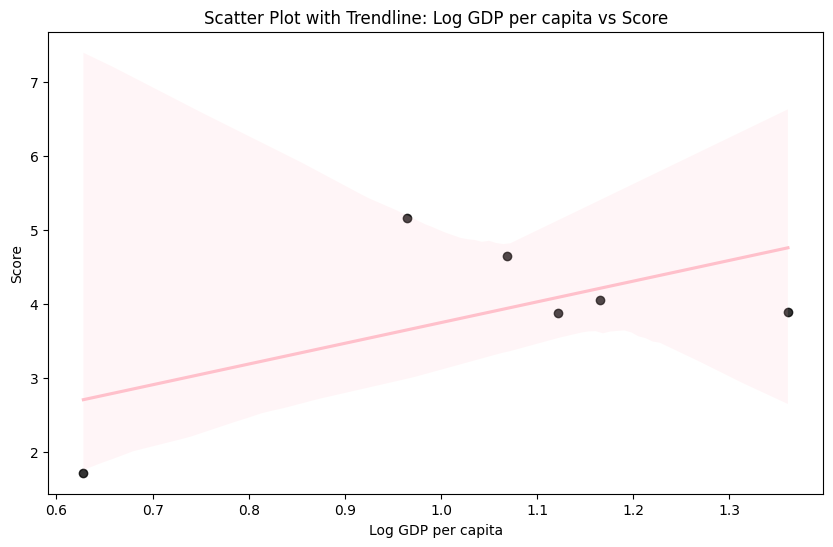

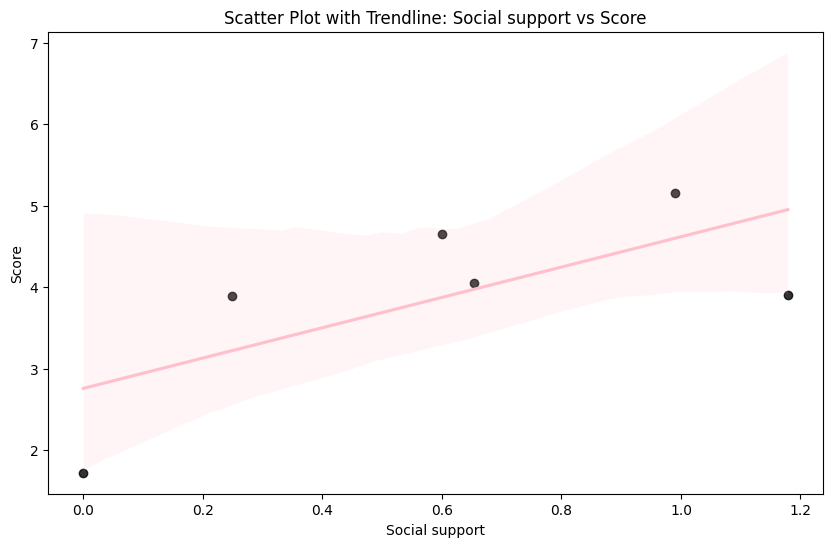

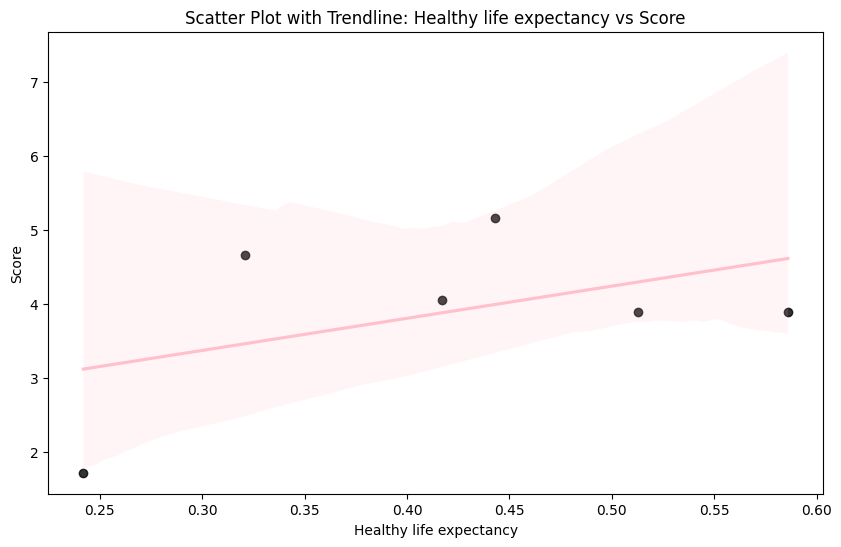

In [81]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=metric, y='score', data=south_asia_data, scatter_kws={'color': 'black'}, line_kws={'color': 'pink'})
    plt.title(f'Scatter Plot with Trendline: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

In [58]:
# Task 5: Gap Analysis
# 1. Add a new column for GDP-Score Gap
south_asia_data['GDP-Score Gap'] = south_asia_data['Log GDP per capita'] - south_asia_data['score']


In [59]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [60]:
# 2. Rank countries by GDP-Score Gap in ascending and descending order
gap_sorted_asc = south_asia_data.sort_values(by='GDP-Score Gap')
gap_sorted_desc = south_asia_data.sort_values(by='GDP-Score Gap', ascending=False)

In [61]:
# 3. Bar chart for top 3 countries with largest positive and negative gaps
top_3_positive_gap = gap_sorted_desc.head(3)
top_3_negative_gap = gap_sorted_asc.head(3)

<ipython-input-62-a089a687abaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')


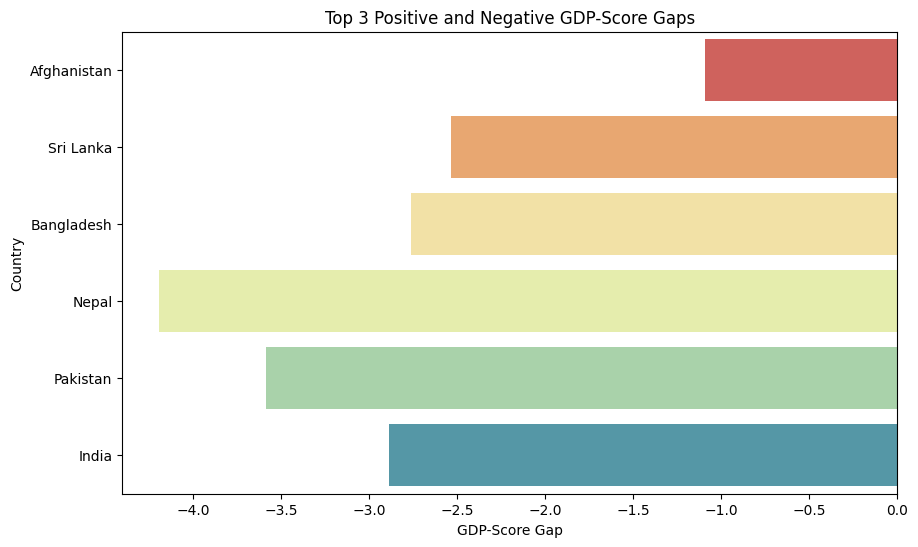

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=pd.concat([top_3_positive_gap, top_3_negative_gap]), palette='Spectral')
plt.title('Top 3 Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.show()

In [63]:
# 4. Analysis of gaps
print("\nAnalysis of GDP-Score Gaps:")
print("Top 3 Positive Gaps:")
print(top_3_positive_gap[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Negative Gaps:")
print(top_3_negative_gap[['Country name', 'GDP-Score Gap']])


Analysis of GDP-Score Gaps:
Top 3 Positive Gaps:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Negative Gaps:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


# Solution-3

In [64]:
# Define Middle Eastern countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon","Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria","United Arab Emirates", "Yemen"]

In [65]:
# Filter dataset for Middle Eastern countries
middle_east_data = data[data['Country name'].isin(middle_east_countries)]
middle_east_data = middle_east_data.copy()

In [66]:
# Save Middle Eastern dataset for future use
middle_east_data.to_csv('MiddleEast_Happiness.csv', index=False)
print("Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'")

Filtered Middle Eastern dataset saved as 'MiddleEast_Happiness.csv'


In [67]:
# 1. Descriptive Statistics
# Calculate mean and standard deviation of Score for South Asia and Middle East
south_asia_mean = south_asia_data['score'].mean()
south_asia_std = south_asia_data['score'].std()
middle_east_mean = middle_east_data['score'].mean()
middle_east_std = middle_east_data['score'].std()

print(f"South Asia - Mean Score: {south_asia_mean:.2f}, Std Dev: {south_asia_std:.2f}")
print(f"Middle East - Mean Score: {middle_east_mean:.2f}, Std Dev: {middle_east_std:.2f}")

# Which region has higher happiness scores on average?
if south_asia_mean > middle_east_mean:
    print("South Asia has a higher average happiness score.")
else:
    print("Middle East has a higher average happiness score.")

South Asia - Mean Score: 3.90, Std Dev: 1.18
Middle East - Mean Score: 5.41, Std Dev: 1.57
Middle East has a higher average happiness score.


<ipython-input-68-623779bf2572>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
<ipython-input-68-623779bf2572>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')


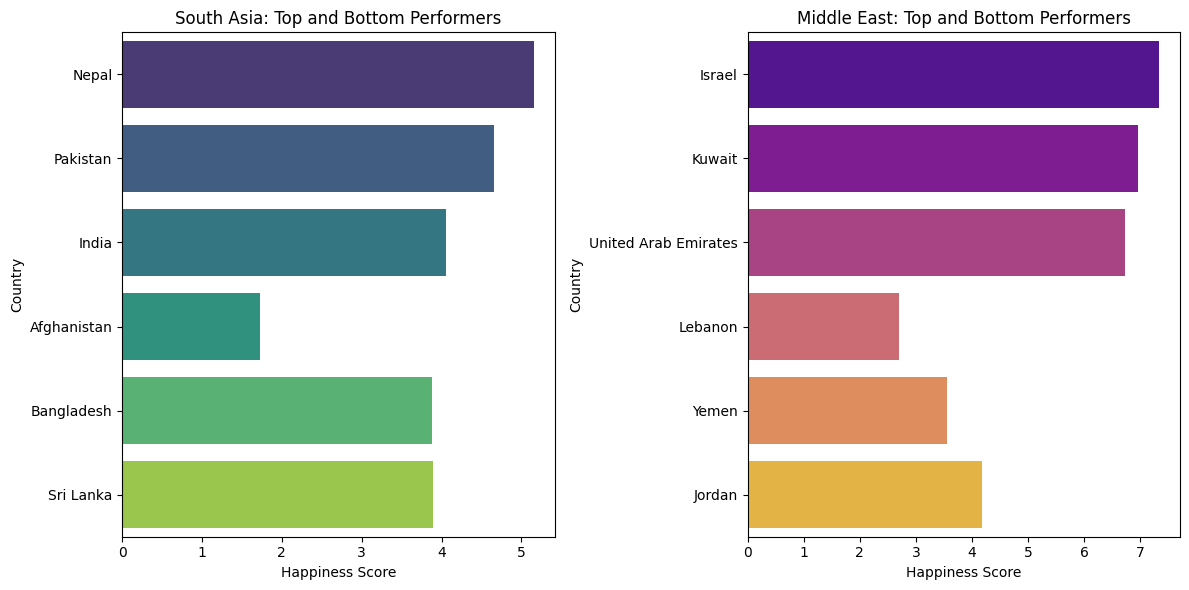

In [68]:
# 2. Top and Bottom Performers
# Identify top 3 and bottom 3 countries by Score in each region
south_asia_top3 = south_asia_data.nlargest(3, 'score')
south_asia_bottom3 = south_asia_data.nsmallest(3, 'score')
middle_east_top3 = middle_east_data.nlargest(3, 'score')
middle_east_bottom3 = middle_east_data.nsmallest(3, 'score')

# Bar chart for top 3 and bottom 3 countries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='score', y='Country name', data=pd.concat([south_asia_top3, south_asia_bottom3]), palette='viridis')
plt.title('South Asia: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x='score', y='Country name', data=pd.concat([middle_east_top3, middle_east_bottom3]), palette='plasma')
plt.title('Middle East: Top and Bottom Performers')
plt.xlabel('Happiness Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()

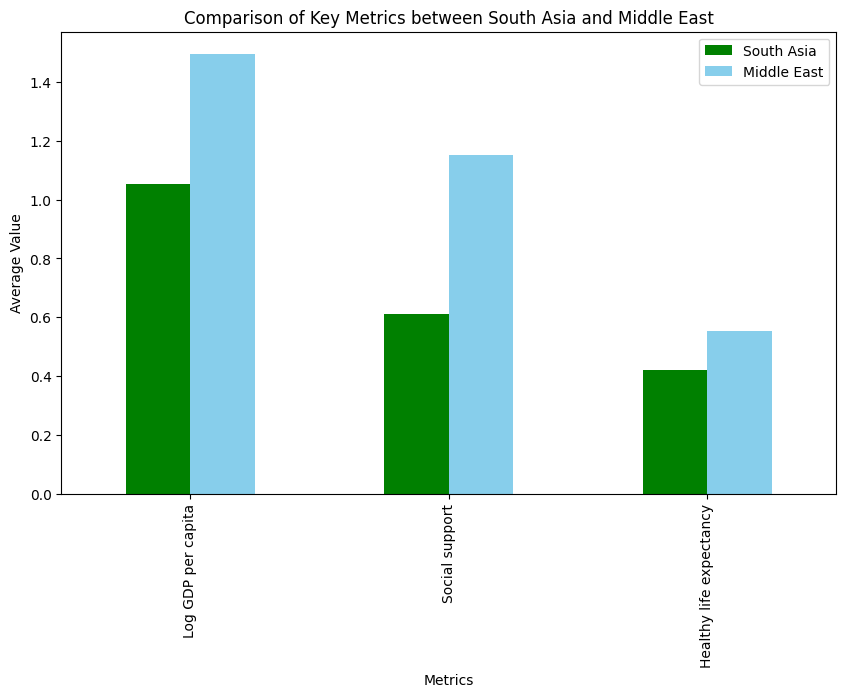

Metric with largest disparity: Social support


In [82]:
# 3. Metric Comparisons
# Grouped bar chart for key metrics
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
south_asia_means = south_asia_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

comparison_df = pd.DataFrame({'South Asia': south_asia_means, 'Middle East': middle_east_means})
comparison_df.plot(kind='bar', figsize=(10, 6), color=['green', 'skyblue'])
plt.title('Comparison of Key Metrics between South Asia and Middle East')
plt.ylabel('Average Value')
plt.xlabel('Metrics')
plt.legend()
plt.show()

# Which metric shows the largest disparity?
disparity = (middle_east_means - south_asia_means).abs()
print("Metric with largest disparity:", disparity.idxmax())

In [70]:

# 4. Happiness Disparity
# Compute range and coefficient of variation for Score
south_asia_range = south_asia_data['score'].max() - south_asia_data['score'].min()
middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()

south_asia_cv = south_asia_std / south_asia_mean
middle_east_cv = middle_east_std / middle_east_mean

print(f"South Asia - Range: {south_asia_range:.2f}, Coefficient of Variation: {south_asia_cv:.2f}")
print(f"Middle East - Range: {middle_east_range:.2f}, Coefficient of Variation: {middle_east_cv:.2f}")

# Which region has greater variability?
if south_asia_cv > middle_east_cv:
    print("South Asia has greater variability in happiness scores.")
else:
    print("Middle East has greater variability in happiness scores.")

South Asia - Range: 3.44, Coefficient of Variation: 0.30
Middle East - Range: 4.63, Coefficient of Variation: 0.29
South Asia has greater variability in happiness scores.


Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


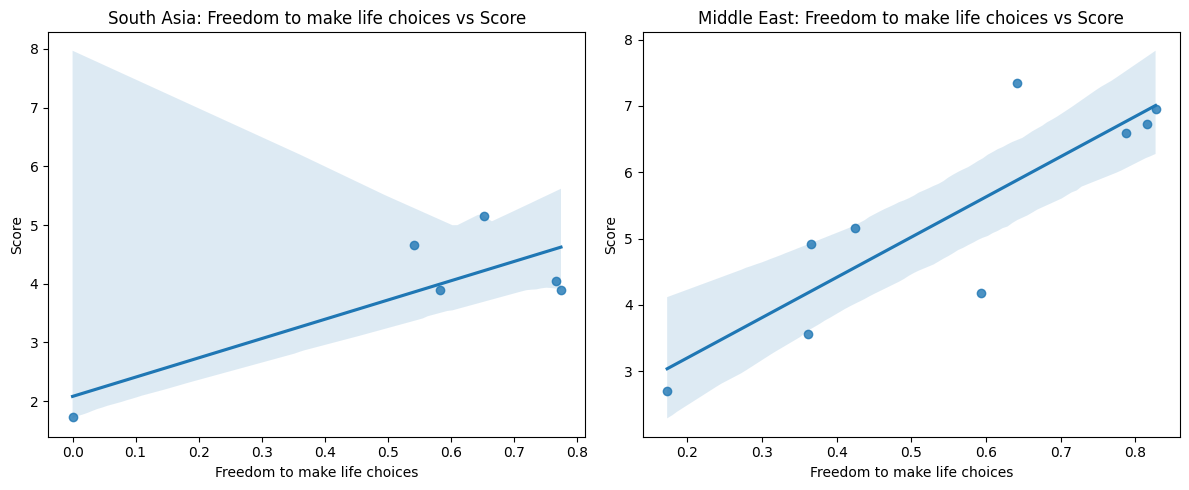

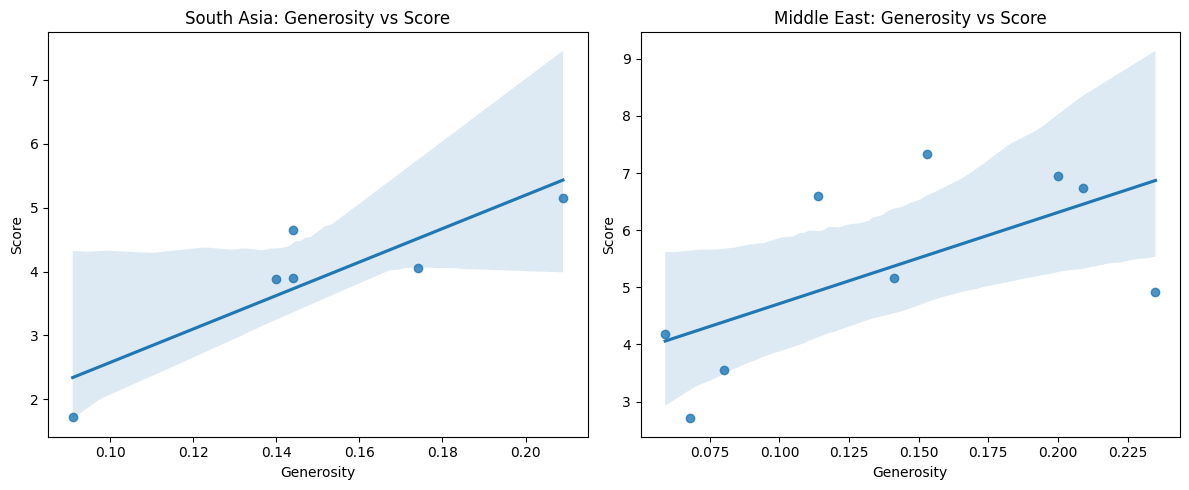

In [71]:
# 5. Correlation Analysis
# Correlation of Score with selected metrics
metrics_to_analyze = ['Freedom to make life choices', 'Generosity']
for metric in metrics_to_analyze:
    south_asia_corr = south_asia_data['score'].corr(south_asia_data[metric])
    middle_east_corr = middle_east_data['score'].corr(middle_east_data[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_asia_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_east_corr:.2f}")

# Scatter plots for correlations
for metric in metrics_to_analyze:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.regplot(x=metric, y='score', data=south_asia_data)
    plt.title(f'South Asia: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.subplot(1, 2, 2)
    sns.regplot(x=metric, y='score', data=middle_east_data)
    plt.title(f'Middle East: {metric} vs Score')
    plt.xlabel(metric)
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

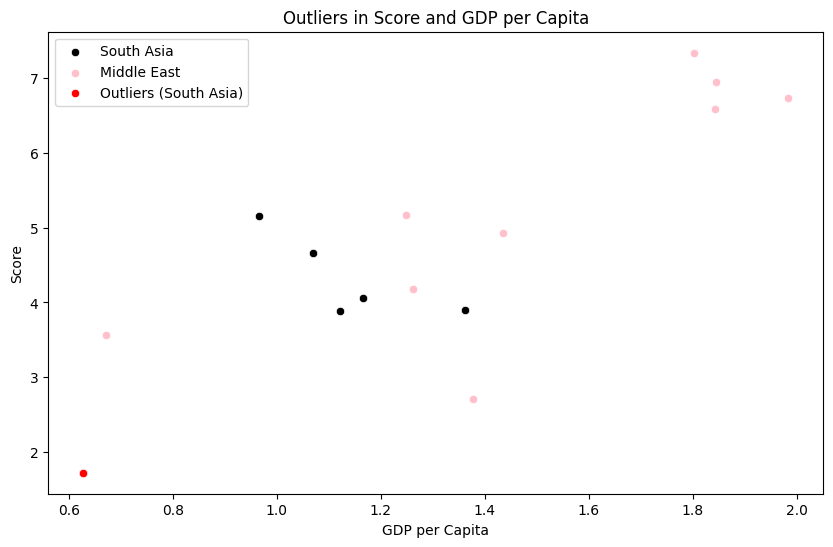

In [83]:

# 6. Outlier Detection
# Detect outliers in both regions
def detect_outliers(column, region_data):
    Q1 = region_data[column].quantile(0.25)
    Q3 = region_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return region_data[(region_data[column] < lower_bound) | (region_data[column] > upper_bound)]

south_asia_outliers = detect_outliers('score', south_asia_data)
middle_east_outliers = detect_outliers('score', middle_east_data)

# Scatter plot highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_data, color='black', label='South Asia')
sns.scatterplot(x='Log GDP per capita', y='score', data=middle_east_data, color='pink', label='Middle East')
sns.scatterplot(x=south_asia_outliers['Log GDP per capita'], y=south_asia_outliers['score'], color='red', label='Outliers (South Asia)')
sns.scatterplot(x=middle_east_outliers['Log GDP per capita'], y=middle_east_outliers['score'], color='blue', label='Outliers (Middle East)')
plt.title('Outliers in Score and GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Score')
plt.legend()
plt.show()

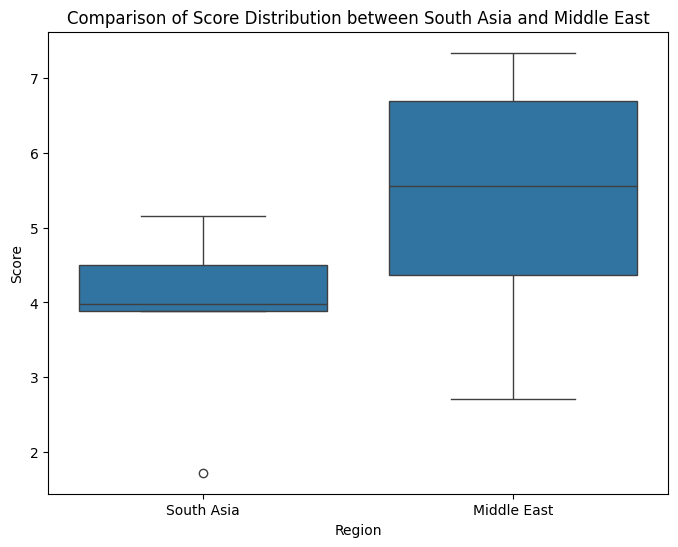

In [73]:
# 7. Visualization: Boxplot Comparison
# Boxplot for Score distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_data.assign(Region='South Asia'),
    middle_east_data.assign(Region='Middle East')
]))
plt.title('Comparison of Score Distribution between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.show()